<font size="5">Data Import and Pre-Processing</font>

### Final Project Requirements:  
There are four sections of the final project. You are expected to perform the following tasks within each section to fulfill the project requirements. 
- **Data Importing and Pre-processing (50 Points)**
    - Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used
    - Clean, wrangle, and handle missing data
    - Transform data appropriately using techniques such as aggregation, normalization, and feature construction
    - Reduce redundant data and perform need based discretization
- **Data Analysis and Visualization (50 Points)**
    - Identify categorical, ordinal, and numerical variables within data
    - Provide measures of centrality and distribution with visualizations
    - Diagnose for correlations between variables and determine independent and dependent variables
    - Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest
- **Data Analytics (50 Points)**
    - Determine the need for a supervised or unsupervised learning method and identify dependent and independent variables
    - Train, test, and provide accuracy and evaluation metrics for model results
- **Presentation (50 Points)**
    - In a 5 to 10 minute presentation, briefly explain the project workflow from the code and results in your markdown notebook State your findings from the data and provide the interpretation of results from your analysis at each stage in the project

Goal: Categorize the users that access the site based on Revenue with Clustering so they can be better marketed to.  

Make sure to move to the location of the file before running.

In [119]:
import pandas as pd
import numpy as np
df=pd.read_csv('online_shoppers_intention.csv')
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm, skew, probplot

In [120]:
cat_count = 0
for dtype in df.dtypes:
    if dtype == 'object':
        cat_count = cat_count + 1
print('# of categorical variables:', cat_count)
print('# of contineous variables:', df.shape[1] - cat_count) 

# of categorical variables: 2
# of contineous variables: 16


In [121]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12202.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12195.000000,12330.000000,12207.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503770,34.472398,31.731468,1194.746220,0.022191,0.043073,5.911196,0.061427,2.123618,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270882,140.749294,44.475503,1913.669288,0.048488,0.048597,18.632116,0.198917,0.911829,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [122]:
# Since we've now done some basic outlining of the dataset. So now I decided to check the Correlation values between the variables.
df.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.374576,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098978,-0.094778,-0.005147,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.303107,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067546,-0.073304,-0.006429,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.374576,0.303107,1.000000,0.618898,0.372895,0.386383,-0.115746,-0.163165,0.048088,-0.048375,-0.008644,-0.037330,-0.028931,-0.033819,0.034319,0.094514
Informational_Duration,0.255848,0.238031,0.618898,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030358,-0.030577,-0.010082,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.372895,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056890,-0.023958,0.004799,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.386383,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052925,-0.036380,0.003932,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.115746,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119170,0.072702,0.023240,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163165,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174586,0.102242,0.014231,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098978,0.067546,0.048088,0.030358,0.056890,0.052925,-0.119170,-0.174586,1.000000,-0.065601,0.019321,0.045279,0.011006,0.013425,0.011918,0.492422
SpecialDay,-0.094778,-0.073304,-0.048375,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.065601,1.000000,0.013342,0.003499,-0.016098,0.052301,-0.016767,-0.082305


<font size="5">Handling Missing Data</font>

In [123]:
# I begin cleaning the data set by dealing with the Null values in each of the data sets.
# We can see that Informational, PageValues, and OperatingSystems have null values.

df.isnull().sum()

Administrative               0
Administrative_Duration      0
Informational              128
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                 135
SpecialDay                   0
Month                        0
OperatingSystems           123
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

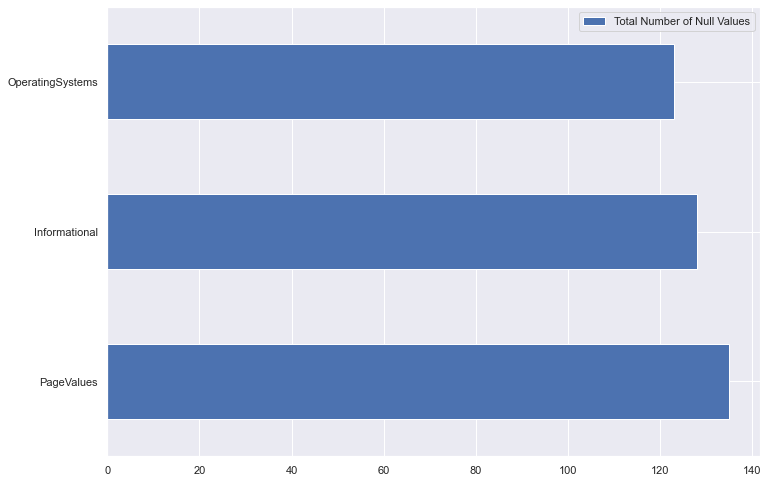

In [124]:
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = df.isnull().sum()     
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Total Number of Null Values' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')

plot_nas(df)

In [125]:
# To see what each piece of data looks like in the set before cleaning.

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1,1,1,Returning_Visitor,False,False
1,0,0.0,0.0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2,1,2,Returning_Visitor,False,False
2,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4.0,1,9,3,Returning_Visitor,False,False
3,0,0.0,0.0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2,2,4,Returning_Visitor,False,False
4,0,0.0,0.0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3,1,4,Returning_Visitor,True,False


In [126]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems           float64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [127]:
# Now that we've done preliminary analysis of the data contained within this file, we will begin cleaning it of Null values. 
# For Informational and PageValues, we will replace Null values with the mean informational value found by describe().
# For Operating system, we will indicate that no OS was specified with a value of version 0.0.

df['Informational'].fillna(df['Informational'].median, inplace = True)
df['PageValues'].fillna(5.911196, inplace = True)
df['OperatingSystems'].fillna(0.0, inplace = True)

Data Summary

In [128]:
# Now that we have cleaned the data a bit, lets take a look at some of the higher correlation values. 
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
print(so)

Administrative           Administrative             1.000000
Administrative_Duration  Administrative_Duration    1.000000
Weekend                  Weekend                    1.000000
TrafficType              TrafficType                1.000000
Region                   Region                     1.000000
                                                      ...   
OperatingSystems         ProductRelated_Duration    0.001221
Weekend                  OperatingSystems           0.000779
OperatingSystems         Weekend                    0.000779
Weekend                  Region                     0.000691
Region                   Weekend                    0.000691
Length: 225, dtype: float64


<font size="5">Exploratory Data Analysis</font>

In [129]:
#We will now take a look at the data found within each variable.
def descriptiveAnalysis(col):
    if(df[col].dtype == "float64" or df[col].dtype == "int64"):
        print(col + ":\n")
        print("Mean:               " + str(df[col].mean()))
        print("Median:             " + str(df[col].median()))
        print("Standard Deviation: " + str(df[col].std()))
        q1 = df[col].quantile(.25)
        q2 = df[col].quantile(.5)
        q3 = df[col].quantile(.75)
        IQR = q3-q1
        lowLim = q1-1.5*IQR
        upLim = q3+1.5*IQR
        print("Q1 =                " + str(q1))
        print("Q2 =                " + str(q2))
        print("Q3 =                " + str(q3))
        print("IQR =               " + str(IQR))
        print("Upper Limit =       " + str(upLim))
        print("Lower Limit =       " + str(lowLim))
        if(df[col].min() > lowLim and df[col].max() < upLim):
            print("There are no outliers in the dataset.\n")
        
        else:
            print("There are outliers in the dataset.\n")
        
    
    else:
        print(col + ":\n")
        if df[col].nunique()==1:
            print("Mode =              " + str(df[col].mode()) + "\n")
            print("Mode Counts =       \n", df[col].value_counts())
        elif df[col].nunique()==2:
            print("Mode =              " + str(df[col].mode()) + "\n")
            print("Mode Counts =       \n", df[col].value_counts())
        elif df[col].nunique()>2:
            print("Mode =              " + str(df[col].mode()) + "\n")
            print("Mode Counts =       \n", df[col].value_counts())
    
    print("______________________________________________________________\n")


In [130]:
print(df['Informational'].mode())

0    0.0
dtype: object


In [131]:
for x in df.columns:
    descriptiveAnalysis(x)

Administrative:

Mean:               2.3151662611516626
Median:             1.0
Standard Deviation: 3.32178410615674
Q1 =                0.0
Q2 =                1.0
Q3 =                4.0
IQR =               4.0
Upper Limit =       10.0
Lower Limit =       -6.0
There are outliers in the dataset.

______________________________________________________________

Administrative_Duration:

Mean:               80.81861053933578
Median:             7.5
Standard Deviation: 176.77910747048236
Q1 =                0.0
Q2 =                7.5
Q3 =                93.25625
IQR =               93.25625
Upper Limit =       233.14062499999997
Lower Limit =       -139.88437499999998
There are outliers in the dataset.

______________________________________________________________

Informational:

Mode =              0    0.0
dtype: object

Mode Counts =       
 0.0                                                                                                                                            

In [132]:
def summary():
    for x in df.columns:
        print("Summary of -- " + x + " --\n")
        print("Shape:          " + str(df[x].shape))
        print("Size:           " + str(df[x].size))
        print("Dimensions:     " + str(df[x].ndim))
        print("Data Type:      " + str(df[x].dtypes))
        print("______________________________________________________________\n")


In [133]:
summary()

Summary of -- Administrative --

Shape:          (12330,)
Size:           12330
Dimensions:     1
Data Type:      int64
______________________________________________________________

Summary of -- Administrative_Duration --

Shape:          (12330,)
Size:           12330
Dimensions:     1
Data Type:      float64
______________________________________________________________

Summary of -- Informational --

Shape:          (12330,)
Size:           12330
Dimensions:     1
Data Type:      object
______________________________________________________________

Summary of -- Informational_Duration --

Shape:          (12330,)
Size:           12330
Dimensions:     1
Data Type:      float64
______________________________________________________________

Summary of -- ProductRelated --

Shape:          (12330,)
Size:           12330
Dimensions:     1
Data Type:      int64
______________________________________________________________

Summary of -- ProductRelated_Duration --

Shape:          (

<font size="5">Data Visualizations</font>

/Users/kbk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


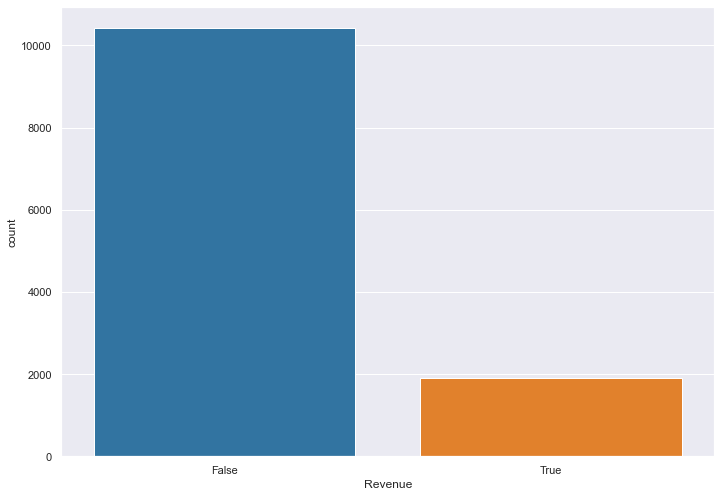

In [134]:
sns.set_theme(style="darkgrid")
sns.countplot(df['Revenue'],palette='tab10')
plt.show()

We can see from this that a majority of the revenue generated by this site is generated by a small percentage of the individuals who accessed it. 

/Users/kbk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


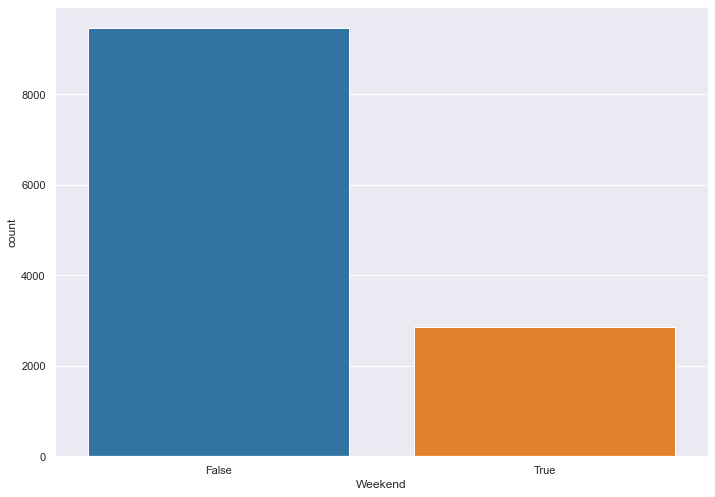

In [135]:
sns.countplot(df['Weekend'],palette='tab10')
plt.show()

We can see that a majority of individuals access this site during weekdays. 

Next lets take a look at the correlation heat map for each of the data values in the dataset.

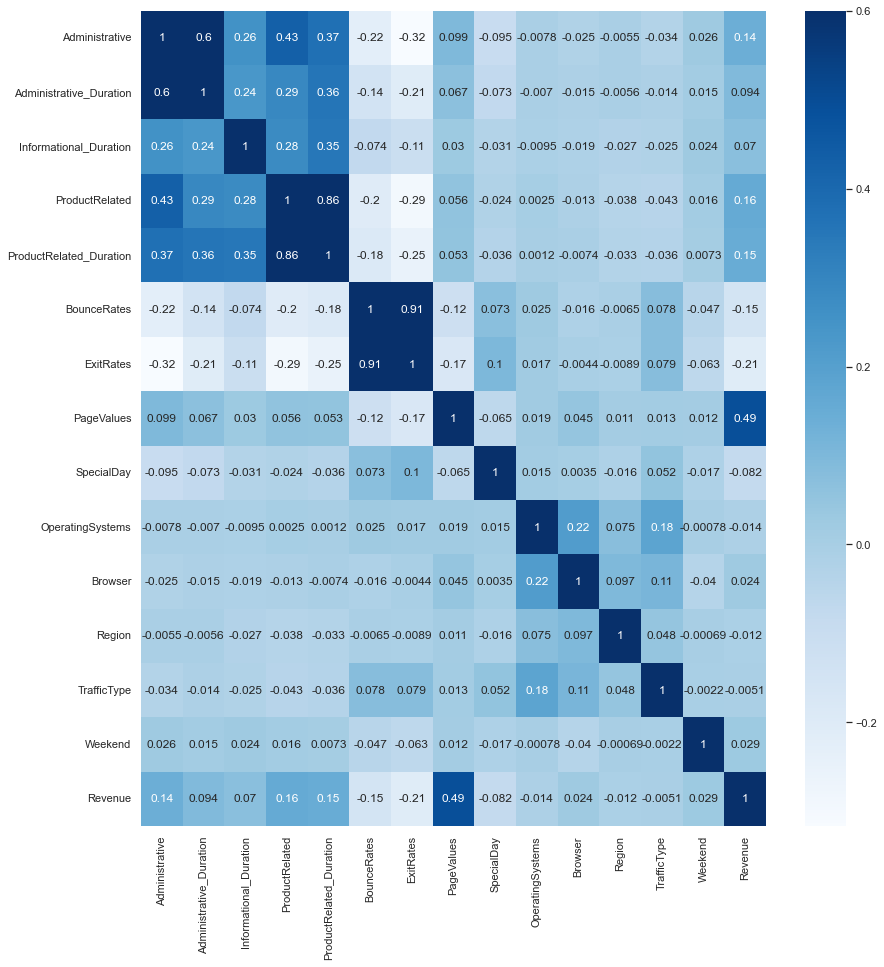

In [136]:
plt.figure(figsize=(14,15))
corr_map = sns.heatmap(df.corr(),annot = True, vmax=.6, cmap = 'Blues')
plt.show()

We don't appear to have any strong negative correlations in the dataset, but we do have a few strong positive correlations. 
PageValue and Revenue are interesting and will be taken note of. 

<AxesSubplot:xlabel='ExitRates', ylabel='BounceRates'>

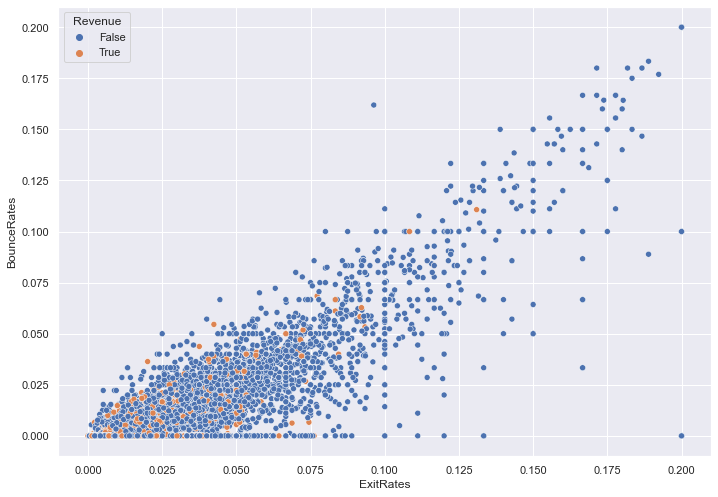

In [137]:
sns.scatterplot(x=df['ExitRates'], y=df['BounceRates'], hue=df['Revenue'])

We can see from this that there is obviously a strong positive correlation, but there are also many outliers. 

We can also see that there may be a correlation between ExitRate and Revenue.

<AxesSubplot:xlabel='PageValues', ylabel='PageValues'>

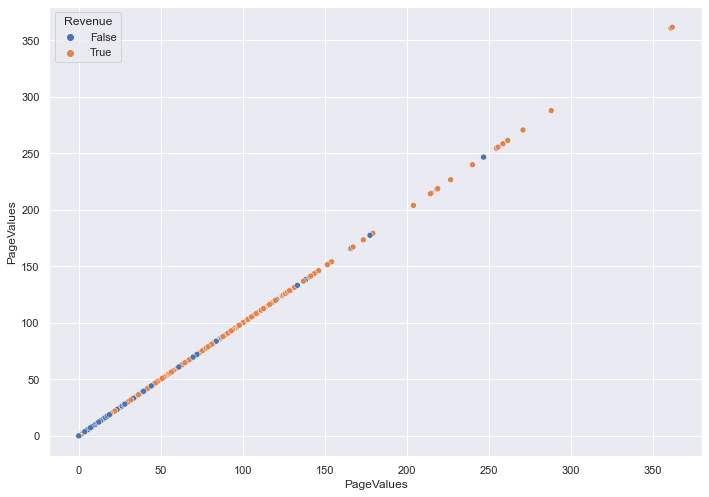

In [138]:
sns.scatterplot(y=df['PageValues'], x=df['PageValues'], hue=df['Revenue'])

Just visually, Revenue and PageValues appear to have a positive correlation, but we will test more.

<AxesSubplot:ylabel='Density'>

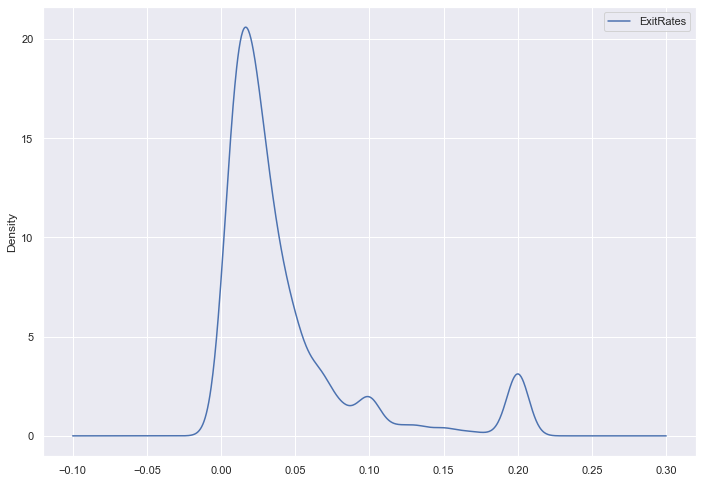

In [139]:
df.plot(x="PageValues", y="ExitRates", kind="kde")

As the Page value increases, we see a stark decrease in overall Exit rates of users. 

/Users/kbk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


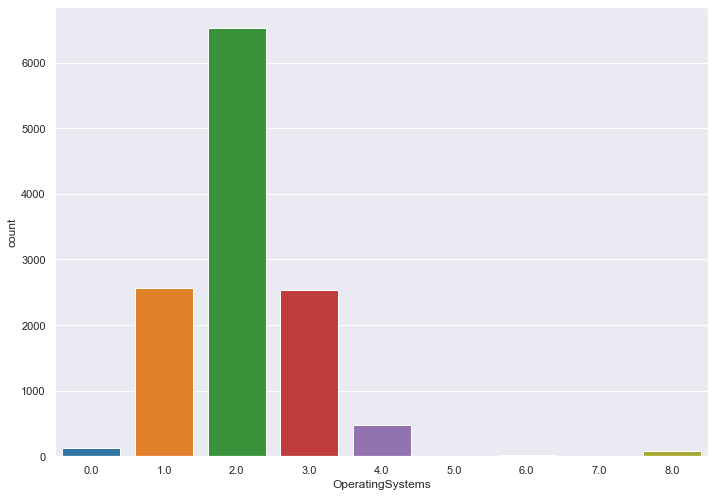

In [140]:
os_bar = sns.countplot(df['OperatingSystems'], palette="tab10")

Most users appear to be using OS 2.0
Reminder that users with a 0.0 value for Operating System have an unknown or ungiven OS when accessing the site. 

/Users/kbk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


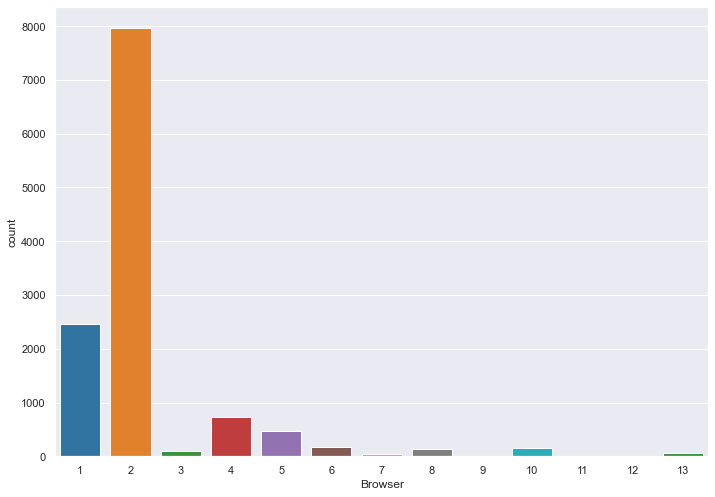

In [141]:
browser_bar = sns.countplot(df['Browser'], palette="tab10")

Most Users appear to be using browser 2.

/Users/kbk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


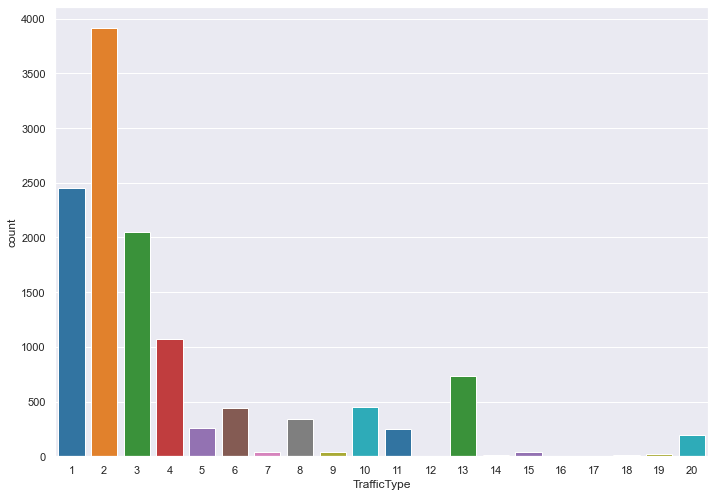

In [142]:
traffic_bar = sns.countplot(df['TrafficType'], palette="tab10")

/Users/kbk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


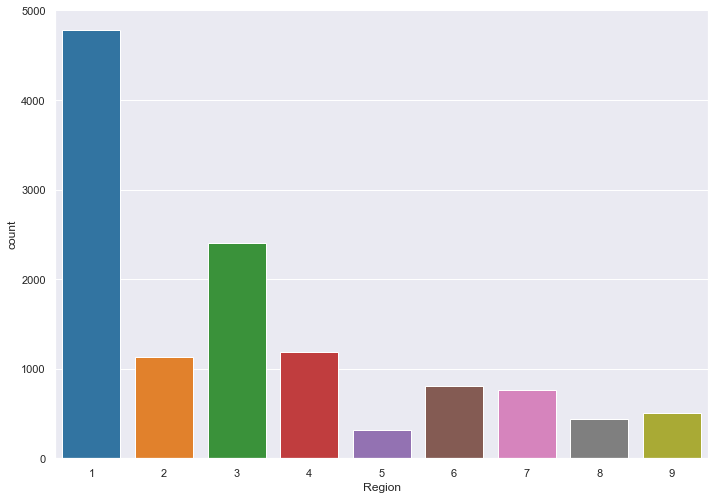

In [143]:
region_bar = sns.countplot(df['Region'], palette="tab10")

We can see that region 1 is the most likely to access the site. 

/Users/kbk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


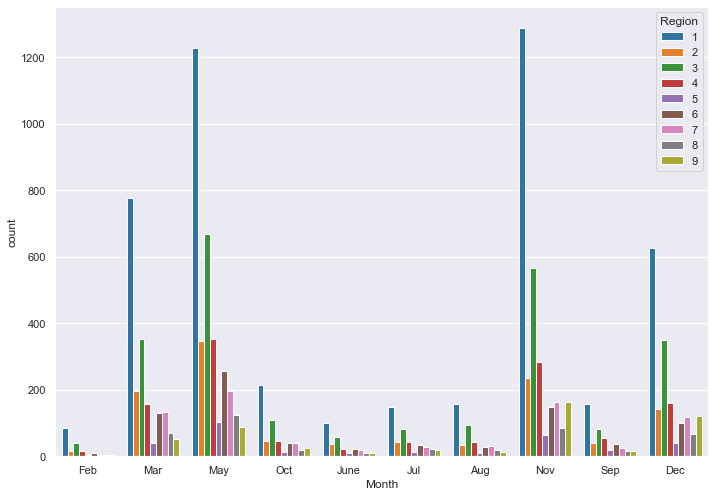

In [144]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
region_access_by_month_bar = sns.countplot(df['Month'], hue = df['Region'], palette="tab10")

Certain regions appear to access the site at differing rates depending on the month. An interesting point to keep track of for later.

/Users/kbk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


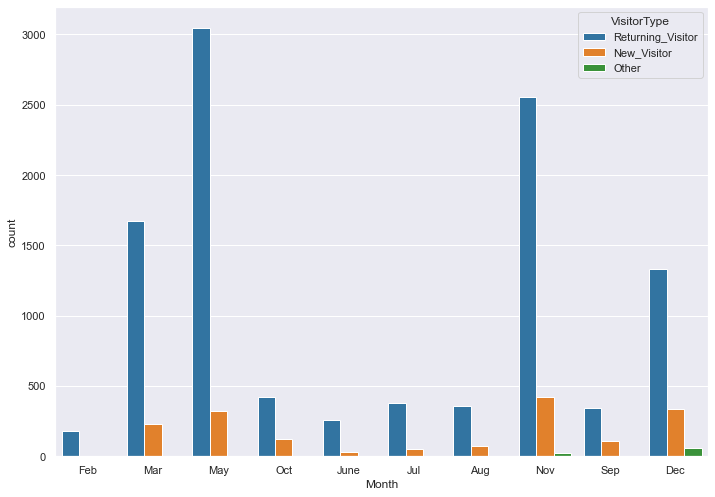

In [145]:
# Vistor Type by Month
sns.set(rc={'figure.figsize':(11.7,8.27)})
vis_type_by_month_bar = sns.countplot(df['Month'], hue = df['VisitorType'], palette="tab10")

We can see that May and November have the 2 highest rates of returning visitors, and November has the highest number of new visitors. 

/Users/kbk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


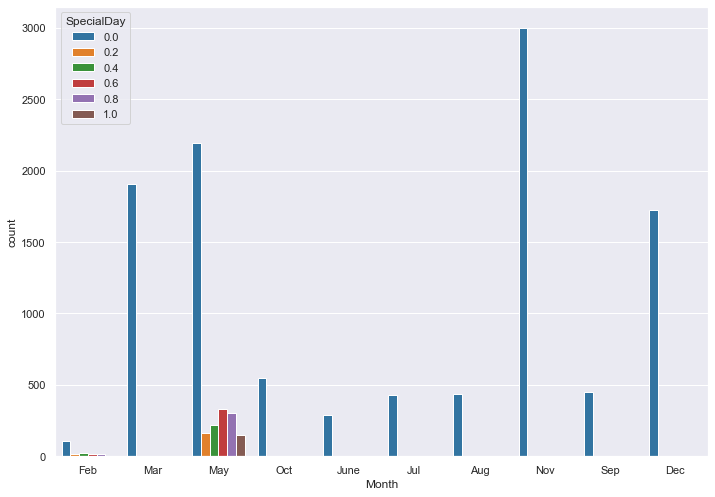

In [146]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
special_day_by_month = sns.countplot(df['Month'], hue = df['SpecialDay'], palette="tab10")

In [147]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

<AxesSubplot:xlabel='Month'>

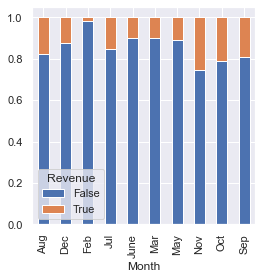

In [148]:
revenue_df=pd.crosstab(df['Month'],df['Revenue']) 
revenue_df.div(revenue_df.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

We can see in this figure that February is the sites lowest rate of Revenue to access numbers, while November appears to have the highest rate. 

Lets take a look at the rate of Visitor Types now:

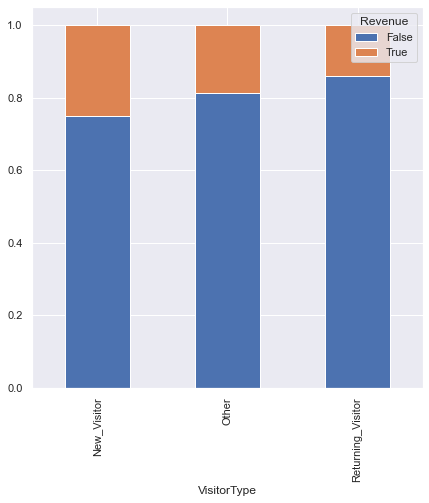

In [149]:
visitor_type_df = pd.crosstab(df['VisitorType'], df['Revenue'])
visitor_type_df.div(visitor_type_df.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(7,7)) 
plt.show() 

/Users/kbk/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Administrative', ylabel='Density'>

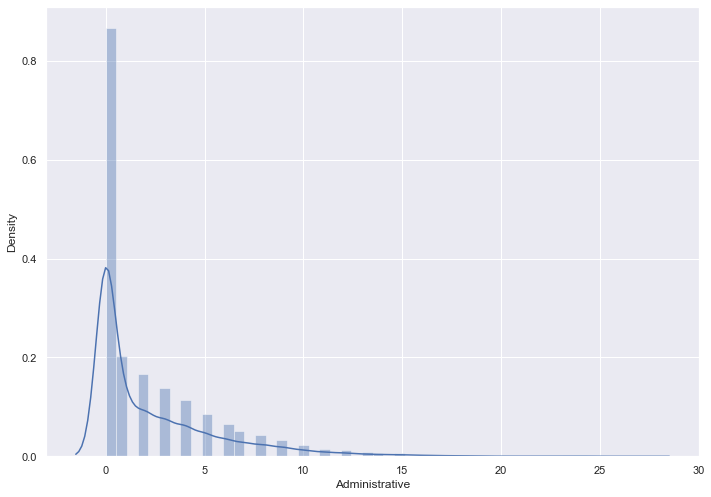

In [150]:
sns.distplot(df['Administrative'])

<AxesSubplot:>

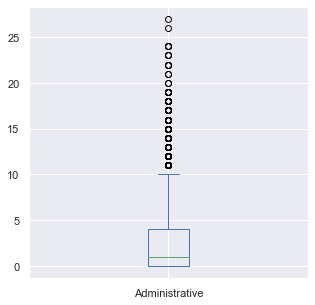

In [151]:
df['Administrative'].plot.box(figsize=(5,5))

From these we can see that Administrative contains many outliers in its dataset. 

Because much of this data is non-normal, we will need to deal with it in a special way. 

I plan on using BoxCox method, to convert the data into a normal format to be more usable. 

<font size="5">Handling Outliers</font>

In [152]:
df_list = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 
           'ProductRelated_Duration', 'BounceRates', 'PageValues', 'SpecialDay', 'TrafficType']
from scipy import stats

In [153]:
numeric_feats = df.dtypes[df.dtypes != "object"].index

Administrative process is completed


/Users/kbk/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/kbk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


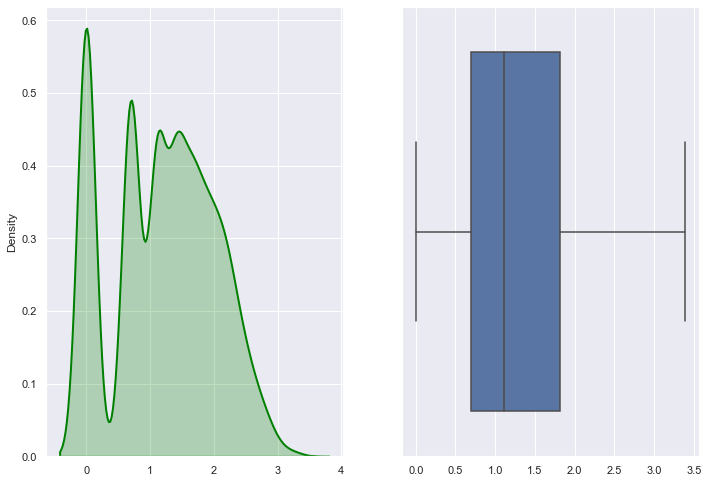

/Users/kbk/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Administrative_Duration process is completed


/Users/kbk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


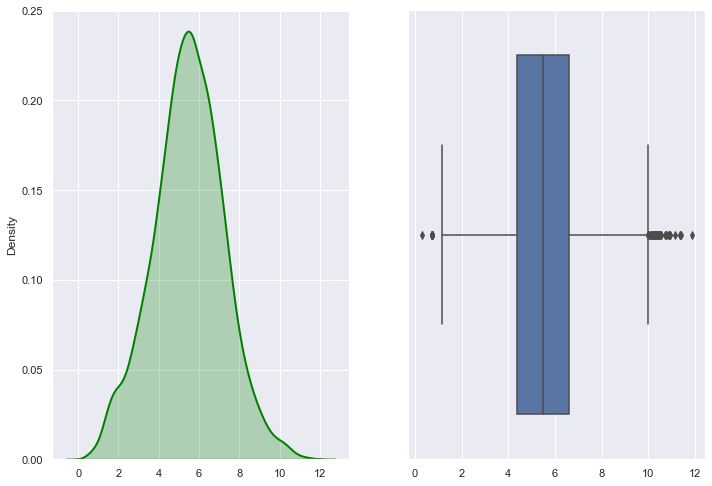

/Users/kbk/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/kbk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Informational_Duration process is completed


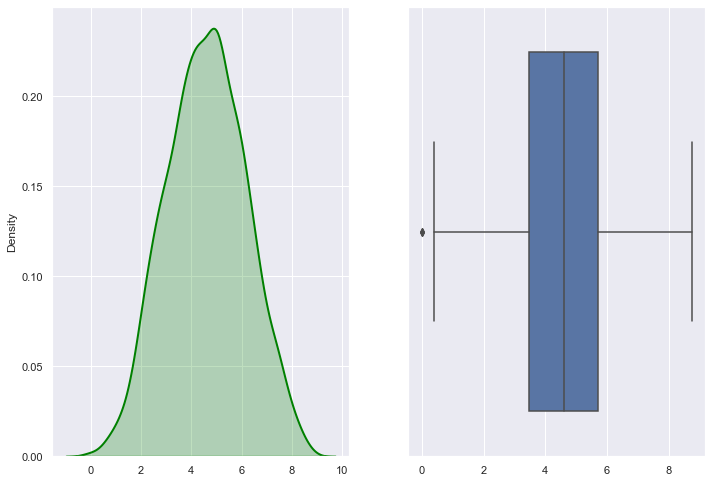

/Users/kbk/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/kbk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ProductRelated process is completed


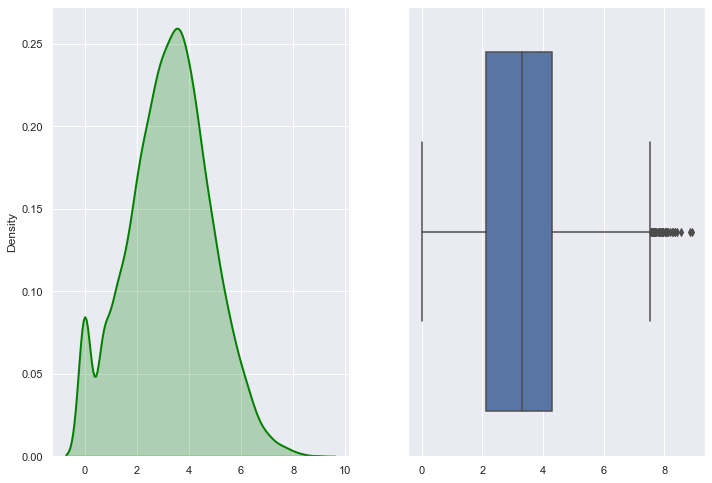

/Users/kbk/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


ProductRelated_Duration process is completed


/Users/kbk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


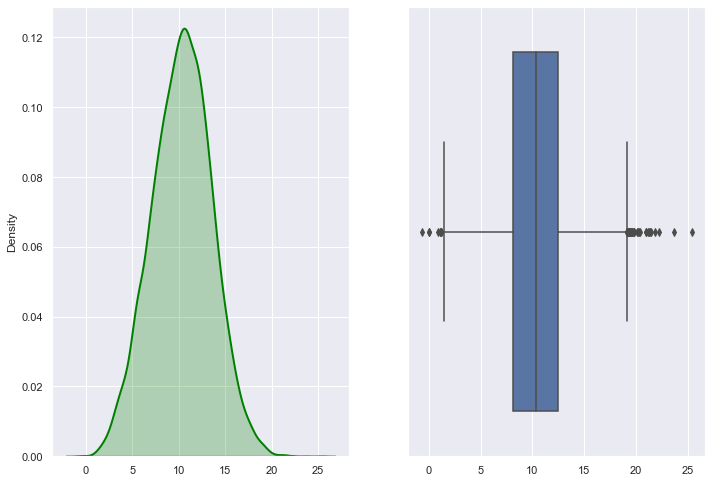

/Users/kbk/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


BounceRates process is completed


/Users/kbk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


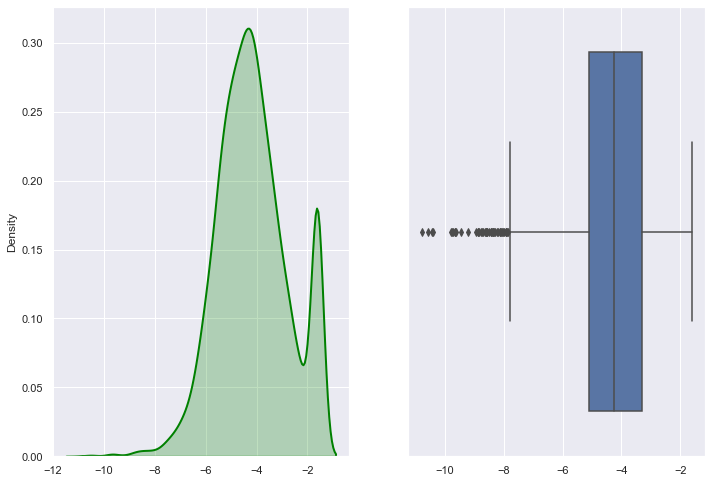

/Users/kbk/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/kbk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


PageValues process is completed


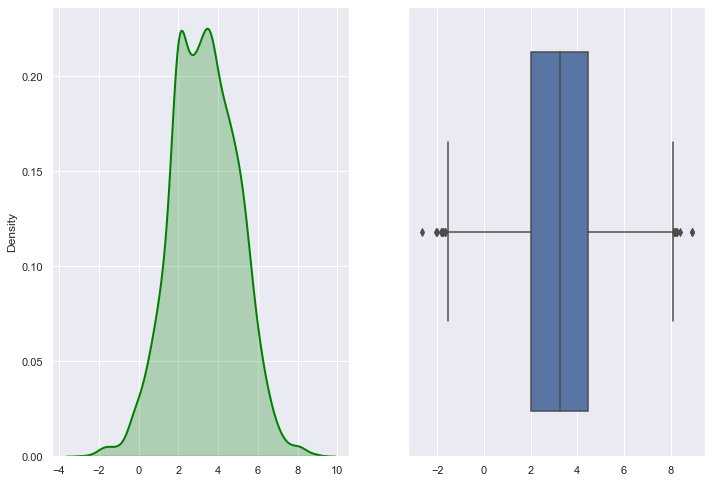

/Users/kbk/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/kbk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


SpecialDay process is completed


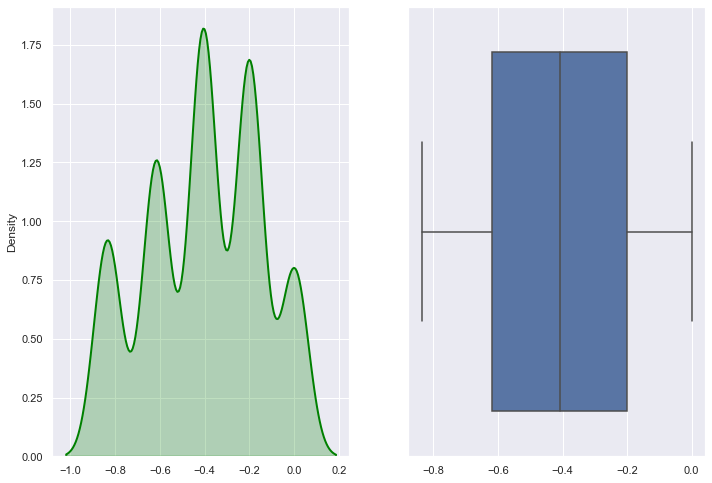

TrafficType process is completed


/Users/kbk/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/kbk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


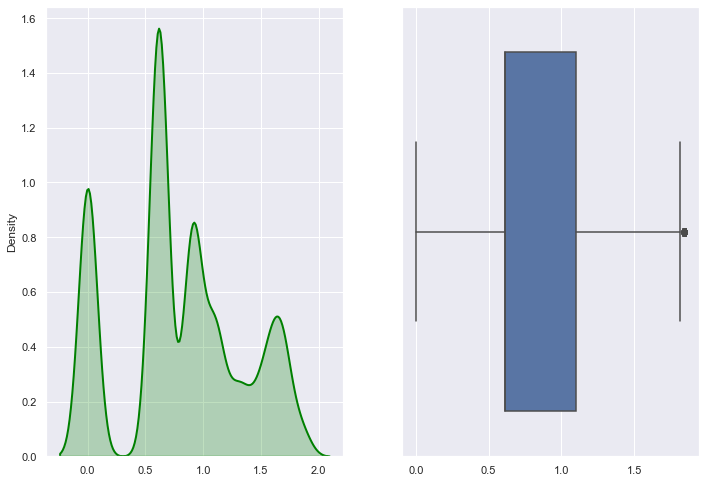

In [154]:
# transform training data & save lambda value
df_cols = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 
           'ProductRelated_Duration', 'BounceRates', 'PageValues', 'SpecialDay', 'TrafficType']
for col in df_cols:
    if df[col].dtypes == 'int64' or df[col].dtypes == 'float64':
        df_pos_vals = df[col][df[col] > 0]
        col_data, fitted_lambda = stats.boxcox(df_pos_vals)
        
  
        # creating axes to draw plots
        fig, ax = plt.subplots(1,2)


        sns.distplot(col_data, hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 2}, 
                     label = "Normal", color ="green", ax = ax[0])
        df.loc[df[col] > 0, col] = col_data
        print('{} process is completed'.format(col))

        plt.subplot(122)
        sns.boxplot(col_data)
        plt.show()

<font size="5">Data Analytics</font>

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error

Now that we have looked at the data, cleaned it, and normalized it for use, we can now begin applying supervised learning methods to the dataset. 

We will be using supervised learning sets because we are attempting to predict whether an individual will make a purchase (I.E. Revenue=True) based on the datasets.

In [156]:
X = df.drop(['Revenue'], axis=1)
y = df['Revenue'] 
X = X.drop(['Informational'], axis=1)
X_enc = X.copy()
y_enc = y.copy()
for col in X.columns:
    if X[col].dtypes == 'object' or X[col].dtypes == 'bool':
        lb = LabelEncoder()
        X_enc[col] = lb.fit_transform(X[col].values)
        y_enc = lb.fit_transform(df['Revenue'])


X.shape, y.shape
x_train, x_test, y_train, y_test = train_test_split(X_enc, y_enc, test_size=.25, random_state=0)
logreg = LogisticRegression(max_iter=1000)

In [157]:
logreg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [158]:
pred = logreg.predict(x_test)

In [159]:
score = logreg.score(x_test, y_test)

In [160]:
accuracy_score(y_test,pred)

0.8803113850145962

In [161]:
cm = metrics.confusion_matrix(y_test, pred)

Text(0.5, 1.0, 'Accuracy Score: 0.8803113850145962')

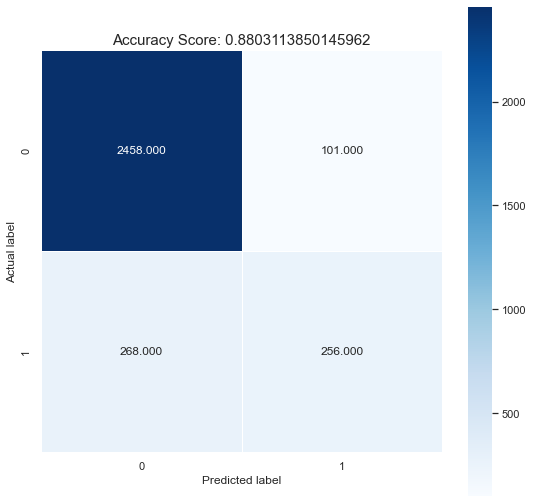

In [162]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

From this graph, we can see the number of times that the model managed to predict True or False for the Revenue value.